# 전국 교통사고 분석

## 1. 데이터 수집

+ https://www.data.go.kr/
    + 공공데이터 포털에서 "교통사고 현황" 검색
    + traffic.csv
    + 대형사고 : 사망자가 3명 이상이거나 부상자(사망자 포함)가 20명 이상인 사고
    + 사망사고 : 사망자가 1명 이상인 사고
    + 중상사고 : 사망자가 없이 중상자가 1명 이상인 사고
    + 경상사고 : 사망자, 중상자 없이 경상자가 1명 이상인 사고
    + 부상신고사고 : 사망자, 중상자, 경상자가 없이 부상신고자가 1명 이상인 사고
    + 중사고 : 사망 또는 중상자가 1명 이상인 사고(사망사고+중상사고)
+ https://www.data.go.kr/
    + 공공데이터 포털에서 "경찰인원 현황" 검색
    + police.csv

In [2]:
# 패키지
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_name = fm.FontProperties(fname="C:/Windows/Fonts/NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

In [3]:
# 시군구_월별_교통사고_현황 불러오기

tf = pd.read_csv("data/traffic.csv", encoding="euc-kr")
tf.head()

,시도,시군구,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1.0,88.0,0.0,33.0,64.0,22.0
1,서울,종로구,2.0,82.0,1.0,27.0,69.0,18.0
2,서울,종로구,3.0,121.0,0.0,48.0,112.0,21.0
3,서울,종로구,4.0,136.0,0.0,45.0,117.0,26.0
4,서울,종로구,5.0,137.0,0.0,43.0,119.0,30.0


In [4]:
# 결측값 확인
tf.isnull()

,시도,시군구,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2742,False,False,False,False,False,False,False,False
2743,False,False,False,False,False,False,False,False
2744,False,False,False,False,False,False,False,False
2745,False,False,False,False,False,False,False,False


In [5]:
# 경찰청_전국 시도별 경찰관 1인당 담당 인구수 데이터 불러오기
pol = pd.read_csv("data/police.csv", encoding='euc-kr')
pol

,지방청,정 원,인 구,1인당 담당인구
0,서울특별시,28717,9729107.0,339.0
1,부산광역시,9058,3413841.0,377.0
2,대구광역시,5752,2438031.0,424.0
3,인천광역시,6446,2957026.0,459.0
4,광주광역시,3437,1456468.0,424.0
5,대전광역시,3222,1474870.0,458.0
6,울산광역시,2474,1148019.0,464.0
7,세종자치시,546,340575.0,624.0
8,경기도남부,17331,9794612.0,565.0
9,경기도북부,6131,3445054.0,562.0


In [6]:
# 결측값 확인
pol.isnull()

,지방청,정 원,인 구,1인당 담당인구
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


## 2. EDA와 전처리
 + 결측치 제거
 + 시도별로 그룹화
 + 수도권/비수도권으로 나누기
 + 정규화
 + 각 컬럼별 비율 값 도출 후 추가
 + 데이터 병합

### 2-1. 시군구_월별_교통사고_현황

In [68]:
# tf 데이터에 교통사고발생건수 파생변수 추가
cols =["사망자수", "중상자수", "경상자수", "부상신고자수"]

tf["부상건수"] = np.sum(tf[cols], axis =1)
tf

,시도,시군구,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,지역
0,서울,종로구,1.0,88.0,0.0,33.0,64.0,22.0,119.0,수도권
1,서울,종로구,2.0,82.0,1.0,27.0,69.0,18.0,115.0,수도권
2,서울,종로구,3.0,121.0,0.0,48.0,112.0,21.0,181.0,수도권
3,서울,종로구,4.0,136.0,0.0,45.0,117.0,26.0,188.0,수도권
4,서울,종로구,5.0,137.0,0.0,43.0,119.0,30.0,192.0,수도권
...,...,...,...,...,...,...,...,...,...,...
2741,세종,세종시,8.0,41.0,5.0,27.0,33.0,1.0,66.0,비수도권
2742,세종,세종시,9.0,42.0,0.0,24.0,43.0,1.0,68.0,비수도권
2743,세종,세종시,10.0,46.0,2.0,19.0,41.0,3.0,65.0,비수도권
2744,세종,세종시,11.0,50.0,0.0,29.0,41.0,4.0,74.0,비수도권


In [8]:
# 결측치 제거
tf.dropna(inplace=True)

#### 2-1-2. 시도 그룹화

In [70]:
# 수도권/비수도권 파생변수 생성

map_dict = {"서울":"수도권", "인천":"수도권", "경기":"수도권",
           "강원":"비수도권", "경북":"비수도권","경남":"비수도권",
           "광주":"비수도권", "대구":"비수도권", "대전":"비수도권",
           "부산":"비수도권", "세종":"비수도권", "울산":"비수도권",
           "전남":"비수도권", "전북":"비수도권", "제주":"비수도권",
           "충남":"비수도권", "충북":"비수도권"}

tf["지역"] = tf["시도"].map(map_dict)
tf.head(5)

,시도,시군구,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,지역
0,서울,종로구,1.0,88.0,0.0,33.0,64.0,22.0,119.0,수도권
1,서울,종로구,2.0,82.0,1.0,27.0,69.0,18.0,115.0,수도권
2,서울,종로구,3.0,121.0,0.0,48.0,112.0,21.0,181.0,수도권
3,서울,종로구,4.0,136.0,0.0,45.0,117.0,26.0,188.0,수도권
4,서울,종로구,5.0,137.0,0.0,43.0,119.0,30.0,192.0,수도권


In [77]:
tf_si = tf.groupby(["시도"]).sum

In [16]:
# 각 컬럼의 비율 추가

tf_si_do["사망자비율"] = tf_si_do["사망자수"] / tf_si_do["사고건수"] * 100
tf_si_do["중상자비율"] = tf_si_do["중상자수"] / tf_si_do["사고건수"] * 100
tf_si_do["경상자비율"] = tf_si_do["경상자수"] / tf_si_do["사고건수"] * 100
tf_si_do["부상자비율"] = tf_si_do["경상자수"] / tf_si_do["사고건수"] * 100

tf_si_do

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율
시도,,,,,,,,,,,
강원,1404.0,8912.0,239.0,3436.0,10873.0,678.0,15226.0,2.681777,38.554758,122.004039,122.004039
경기,2418.0,52954.0,880.0,20200.0,55341.0,6222.0,82643.0,1.661820,38.146316,104.507686,104.507686
경남,1404.0,13677.0,406.0,7580.0,11124.0,1437.0,20547.0,2.968487,55.421511,81.333626,81.333626
경북,1781.0,15752.0,507.0,7783.0,14619.0,1478.0,24387.0,3.218639,49.409599,92.807263,92.807263
광주,390.0,7864.0,97.0,1612.0,10627.0,357.0,12693.0,1.233469,20.498474,135.134791,135.134791
대구,624.0,14228.0,161.0,5130.0,13569.0,1734.0,20594.0,1.131572,36.055665,95.368288,95.368288
대전,390.0,6901.0,97.0,2392.0,7798.0,223.0,10510.0,1.405593,34.661643,112.998116,112.998116
부산,1248.0,12757.0,178.0,5747.0,10601.0,1536.0,18062.0,1.395312,45.049777,83.099475,83.099475
서울,1950.0,41665.0,376.0,14432.0,37706.0,6518.0,59032.0,0.902436,34.638186,90.498020,90.498020


In [18]:
# 발생비율이 100 넘는 것들은 100으로 맞춰준다

cols_list =["사망자비율", "중상자비율", "경상자비율", "부상자비율"]
for col in cols_list:
    tf_si_do.loc[tf_si_do[col] > 100, col] = 100
    
tf_si_do.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율
시도,,,,,,,,,,,
강원,1404.0,8912.0,239.0,3436.0,10873.0,678.0,15226.0,2.681777,38.554758,100.000000,100.000000
경기,2418.0,52954.0,880.0,20200.0,55341.0,6222.0,82643.0,1.661820,38.146316,100.000000,100.000000
경남,1404.0,13677.0,406.0,7580.0,11124.0,1437.0,20547.0,2.968487,55.421511,81.333626,81.333626
경북,1781.0,15752.0,507.0,7783.0,14619.0,1478.0,24387.0,3.218639,49.409599,92.807263,92.807263
광주,390.0,7864.0,97.0,1612.0,10627.0,357.0,12693.0,1.233469,20.498474,100.000000,100.000000


In [82]:
# 정규화
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

cols =["사고건수", "사망자수", "중상자수", "경상자수", "부상신고자수", "부상건수"]
x2 = tf_si_do[cols].values
x2

x_scaled1 = min_max_scaler.fit_transform(x2.astype(float))

x_scaled1

tf_si_do_norm= pd.DataFrame(x_scaled1, columns=cols, index=tf_si_do.index)
tf_si_do_norm

# 각 칼럼별 비율 추가
cols = ["사망자비율", "중상자비율", "경상자비율", "부상자비율"]
tf_si_do_norm[cols] = tf_si_do[cols]
tf_si_do_norm

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율
시도,,,,,,,,,,
강원,0.159792,0.255517,0.157122,0.188481,0.099738,0.175196,2.681777,38.554758,100.000000,100.000000
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263
광주,0.139799,0.090592,0.065413,0.183992,0.050254,0.144206,1.233469,20.498474,100.000000,100.000000
대구,0.261208,0.164925,0.242295,0.237682,0.262525,0.240870,1.131572,36.055665,95.368288,95.368288
대전,0.121428,0.090592,0.104631,0.132364,0.029598,0.117499,1.405593,34.661643,100.000000,100.000000
부산,0.233145,0.184669,0.273317,0.183517,0.232002,0.209893,1.395312,45.049777,83.099475,83.099475
서울,0.784635,0.414634,0.709990,0.678170,1.000000,0.711134,0.902436,34.638186,90.498020,90.498020


In [83]:
##### 중간체크포인트 #####
tf_si_do_norm.to_csv("data/tf_sido_norm.csv", encoding="utf-8")

In [84]:
tf_sido_norm = pd.read_csv("data/tf_sido_norm.csv", encoding="utf-8", index_col=[0])
tf_sido_norm.head()

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율
시도,,,,,,,,,,
강원,0.159792,0.255517,0.157122,0.188481,0.099738,0.175196,2.681777,38.554758,100.000000,100.000000
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263
광주,0.139799,0.090592,0.065413,0.183992,0.050254,0.144206,1.233469,20.498474,100.000000,100.000000


#### 2-2-1. 경찰인원 근황 데이터 수도권 /비수도권 파생변수 추가

In [91]:
# 결측값제거 및 데이터 전처리
pol2 = pol.dropna()
pol2
map_dict = {"서울특별시":"수도권", "인천광역시":"수도권", "경기도남부":"수도권",
            "경기도북부":"수도권","강원도":"비수도권", "경상남도":"비수도권",
            "경상북도":"비수도권", "대구광역시":"비수도권", "대전광역시":"비수도권", 
            "부산광역시":"비수도권", "세종자치시":"비수도권","울산광역시":"비수도권",
            "전라남도":"비수도권", "전라북도":"비수도권", "제주특별자치도":"비수도권",
            "충청남도":"비수도권", "충청북도":"비수도권", "광주광역시":"비수도권"}

pol2["지역"] = pol2.iloc[:, 0].map(map_dict)
pol2.replace({"지역":np.nan},{"지역":"비수도권"}, inplace=True)
pol2

<ipython-input-91-6adcacedc029>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pol2["지역"] = pol2.iloc[:, 0].map(map_dict)
C:\Users\leeya\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,지방청,정 원,인 구,1인당 담당인구,지역
0,서울특별시,28717,9729107.0,339.0,수도권
1,부산광역시,9058,3413841.0,377.0,비수도권
2,대구광역시,5752,2438031.0,424.0,비수도권
3,인천광역시,6446,2957026.0,459.0,수도권
4,광주광역시,3437,1456468.0,424.0,비수도권
5,대전광역시,3222,1474870.0,458.0,비수도권
6,울산광역시,2474,1148019.0,464.0,비수도권
7,세종자치시,546,340575.0,624.0,비수도권
8,경기도남부,17331,9794612.0,565.0,수도권
9,경기도북부,6131,3445054.0,562.0,수도권


### 2-3. 시도 데이터와 경찰청 담당인구 데이터 병합

In [86]:
tf_sido_norm

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율
시도,,,,,,,,,,
강원,0.159792,0.255517,0.157122,0.188481,0.099738,0.175196,2.681777,38.554758,100.000000,100.000000
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263
광주,0.139799,0.090592,0.065413,0.183992,0.050254,0.144206,1.233469,20.498474,100.000000,100.000000
대구,0.261208,0.164925,0.242295,0.237682,0.262525,0.240870,1.131572,36.055665,95.368288,95.368288
대전,0.121428,0.090592,0.104631,0.132364,0.029598,0.117499,1.405593,34.661643,100.000000,100.000000
부산,0.233145,0.184669,0.273317,0.183517,0.232002,0.209893,1.395312,45.049777,83.099475,83.099475
서울,0.784635,0.414634,0.709990,0.678170,1.000000,0.711134,0.902436,34.638186,90.498020,90.498020


In [92]:
# 경기도 남부, 북부 데이터 삭제
pol2_area = pol2.drop([8, 9], axis=0)

In [93]:
#데이터 확인
pol2_area

,지방청,정 원,인 구,1인당 담당인구,지역
0,서울특별시,28717,9729107.0,339.0,수도권
1,부산광역시,9058,3413841.0,377.0,비수도권
2,대구광역시,5752,2438031.0,424.0,비수도권
3,인천광역시,6446,2957026.0,459.0,수도권
4,광주광역시,3437,1456468.0,424.0,비수도권
5,대전광역시,3222,1474870.0,458.0,비수도권
6,울산광역시,2474,1148019.0,464.0,비수도권
7,세종자치시,546,340575.0,624.0,비수도권
10,강원도,4258,1541502.0,362.0,비수도권
11,충청북도,3574,1600007.0,448.0,비수도권


In [94]:
# 경기도남부와 경기도북부를 합쳐 새로운 행으로 추가
new_data = {"지방청": "경기도",
           "정 원": 23462,
           "인 구": 13239666,
           "1인당 담당인구": 564,
           "지역": "수도권"}
#인덱스 설정
idx = 8 

temp1 = pol2_area[pol2_area.index < idx]
temp2 = pol2_area[pol2_area.index >= idx]

pol2_area = temp1.append(new_data, ignore_index=True).append(temp2, ignore_index=True)

In [95]:
# 데이터 확인
pol2_area

,지방청,정 원,인 구,1인당 담당인구,지역
0,서울특별시,28717,9729107.0,339.0,수도권
1,부산광역시,9058,3413841.0,377.0,비수도권
2,대구광역시,5752,2438031.0,424.0,비수도권
3,인천광역시,6446,2957026.0,459.0,수도권
4,광주광역시,3437,1456468.0,424.0,비수도권
5,대전광역시,3222,1474870.0,458.0,비수도권
6,울산광역시,2474,1148019.0,464.0,비수도권
7,세종자치시,546,340575.0,624.0,비수도권
8,경기도,23462,13239666.0,564.0,수도권
9,강원도,4258,1541502.0,362.0,비수도권


In [101]:
# 시도 파생변수 추가
pol2_area["시도"] = ["서울", "부산", "대구", "인천", "광주", "대전", 
                   "울산", "세종", "경기", "강원", "충북", "충남", "전북",
                  "전남", "경북", "경남", "제주"]
pol2_area

,정 원,인 구,1인당 담당인구,지역,시도
0,28717,9729107.0,339.0,수도권,서울
1,9058,3413841.0,377.0,비수도권,부산
2,5752,2438031.0,424.0,비수도권,대구
3,6446,2957026.0,459.0,수도권,인천
4,3437,1456468.0,424.0,비수도권,광주
5,3222,1474870.0,458.0,비수도권,대전
6,2474,1148019.0,464.0,비수도권,울산
7,546,340575.0,624.0,비수도권,세종
8,23462,13239666.0,564.0,수도권,경기
9,4258,1541502.0,362.0,비수도권,강원


In [97]:
# 지방청삭제
del pol2_area["지방청"]

In [98]:
# 시도로 인덱스
pol2_si_do = pol2_area.set_index(pol2_area["시도"])
pol2_si_do

,정 원,인 구,1인당 담당인구,지역,시도
시도,,,,,
서울,28717,9729107.0,339.0,수도권,서울
부산,9058,3413841.0,377.0,비수도권,부산
대구,5752,2438031.0,424.0,비수도권,대구
인천,6446,2957026.0,459.0,수도권,인천
광주,3437,1456468.0,424.0,비수도권,광주
대전,3222,1474870.0,458.0,비수도권,대전
울산,2474,1148019.0,464.0,비수도권,울산
세종,546,340575.0,624.0,비수도권,세종
경기,23462,13239666.0,564.0,수도권,경기


In [108]:
tf_sido_norm[["인구수", "경찰정원수", "1인당 담당인구", "지역"]] = pol2_si_do[["인 구", "정 원", "1인당 담당인구", "지역"]]

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율,인구수,경찰정원수,1인당 담당인구,지역
시도,,,,,,,,,,,,,,
강원,0.159792,0.255517,0.157122,0.188481,0.099738,0.175196,2.681777,38.554758,100.000000,100.000000,1541502.0,4258,362.0,비수도권
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000,13239666.0,23462,564.0,수도권
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626,3362553.0,6961,483.0,비수도권
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263,2665836.0,6528,408.0,비수도권
광주,0.139799,0.090592,0.065413,0.183992,0.050254,0.144206,1.233469,20.498474,100.000000,100.000000,1456468.0,3437,424.0,비수도권
대구,0.261208,0.164925,0.242295,0.237682,0.262525,0.240870,1.131572,36.055665,95.368288,95.368288,2438031.0,5752,424.0,비수도권
대전,0.121428,0.090592,0.104631,0.132364,0.029598,0.117499,1.405593,34.661643,100.000000,100.000000,1474870.0,3222,458.0,비수도권
부산,0.233145,0.184669,0.273317,0.183517,0.232002,0.209893,1.395312,45.049777,83.099475,83.099475,3413841.0,9058,377.0,비수도권
서울,0.784635,0.414634,0.709990,0.678170,1.000000,0.711134,0.902436,34.638186,90.498020,90.498020,9729107.0,28717,339.0,수도권


In [109]:
#### 중간체크포인트 ####
tf_sido_norm.to_csv("data/tf_sido_merge.csv", encoding="utf-8")

 ### 3. 시각화 및 분석

In [130]:
sns.set_theme(style="darkgrid")
font_name = fm.FontProperties(fname="C:/Windows/Fonts/NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)

In [111]:
tf_sido_merge = pd.read_csv("data/tf_sido_merge.csv", encoding="utf-8", index_col="시도")

In [171]:
tf_sido_merge

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율,인구수,경찰정원수,1인당 담당인구,지역
시도,,,,,,,,,,,,,,
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000,13239666.0,23462,564.0,수도권
서울,0.784635,0.414634,0.709990,0.678170,1.000000,0.711134,0.902436,34.638186,90.498020,90.498020,9729107.0,28717,339.0,수도권
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263,2665836.0,6528,408.0,비수도권
대구,0.261208,0.164925,0.242295,0.237682,0.262525,0.240870,1.131572,36.055665,95.368288,95.368288,2438031.0,5752,424.0,비수도권
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626,3362553.0,6961,483.0,비수도권
부산,0.233145,0.184669,0.273317,0.183517,0.232002,0.209893,1.395312,45.049777,83.099475,83.099475,3413841.0,9058,377.0,비수도권
전남,0.188561,0.454123,0.181055,0.217662,0.093263,0.202161,3.934741,37.543186,100.000000,100.000000,1868745.0,5464,342.0,비수도권
충남,0.169503,0.421603,0.223591,0.160066,0.063203,0.171171,4.054771,50.504193,98.885469,98.885469,2123709.0,4627,459.0,비수도권
충북,0.167862,0.254355,0.196390,0.174739,0.086172,0.174450,2.549545,45.174076,100.000000,100.000000,1600007.0,3574,448.0,비수도권


#### 3-1. 지역별 비교

Text(0.5, 1.0, '지역별 사고건수')

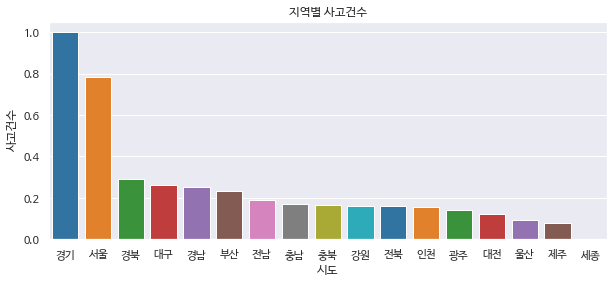

In [206]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=tf_sido_merge.index, y="사고건수", data=tf_sido_merge, palette="tab10")
plt.title("지역별 사고건수")

In [161]:
tf_sort_one = tf_sido_norm.sort_values("1인당 담당인구", ascending=False)

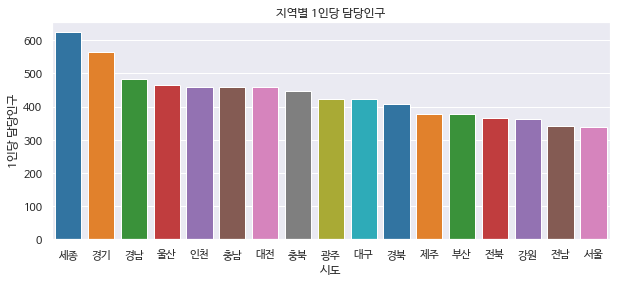

In [203]:
plt.figure(figsize=(10, 4))
sns.barplot(x=tf_sort_one.index, y="1인당 담당인구", data=tf_sort_one, palette="tab10")
plt.title("지역별 1인당 담당인구")

In [172]:
tf_sort_pol = tf_sido_norm.sort_values("경찰정원수", ascending=False)
tf_sort_pol

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율,인구수,경찰정원수,1인당 담당인구,지역
시도,,,,,,,,,,,,,,
서울,0.784635,0.414634,0.709990,0.678170,1.000000,0.711134,0.902436,34.638186,90.498020,90.498020,9729107.0,28717,339.0,수도권
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000,13239666.0,23462,564.0,수도권
부산,0.233145,0.184669,0.273317,0.183517,0.232002,0.209893,1.395312,45.049777,83.099475,83.099475,3413841.0,9058,377.0,비수도권
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626,3362553.0,6961,483.0,비수도권
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263,2665836.0,6528,408.0,비수도권
인천,0.156263,0.135889,0.162200,0.153825,0.089718,0.151143,1.558382,40.529392,100.000000,100.000000,2957026.0,6446,459.0,수도권
대구,0.261208,0.164925,0.242295,0.237682,0.262525,0.240870,1.131572,36.055665,95.368288,95.368288,2438031.0,5752,424.0,비수도권
전남,0.188561,0.454123,0.181055,0.217662,0.093263,0.202161,3.934741,37.543186,100.000000,100.000000,1868745.0,5464,342.0,비수도권
전북,0.159048,0.335656,0.154859,0.180104,0.039001,0.165054,3.471205,38.217063,100.000000,100.000000,1818917.0,4954,367.0,비수도권


Text(0.5, 1.0, '지역별 경찰정원수')

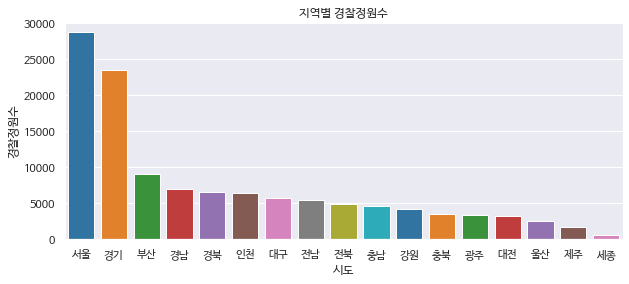

In [173]:
plt.figure(figsize=(10, 4))
sns.barplot(x=tf_sort_pol.index, y="경찰정원수", data=tf_sort_pol, palette="tab10")
plt.title("지역별 경찰정원수")

#### 3-2. 상관관계분석

In [118]:
print(np.corrcoef(tf_sido_merge["사고건수"], tf_sido_merge["경찰정원수"]))
print(np.corrcoef(tf_sido_merge["사고건수"], tf_sido_merge["1인당 담당인구"]))
print(np.corrcoef(tf_sido_merge["사고건수"], tf_sido_merge["인구수"]))

[[1.         0.95206333]
 [0.95206333 1.        ]]
[[1.         0.04675953]
 [0.04675953 1.        ]]
[[1.         0.98831889]
 [0.98831889 1.        ]]


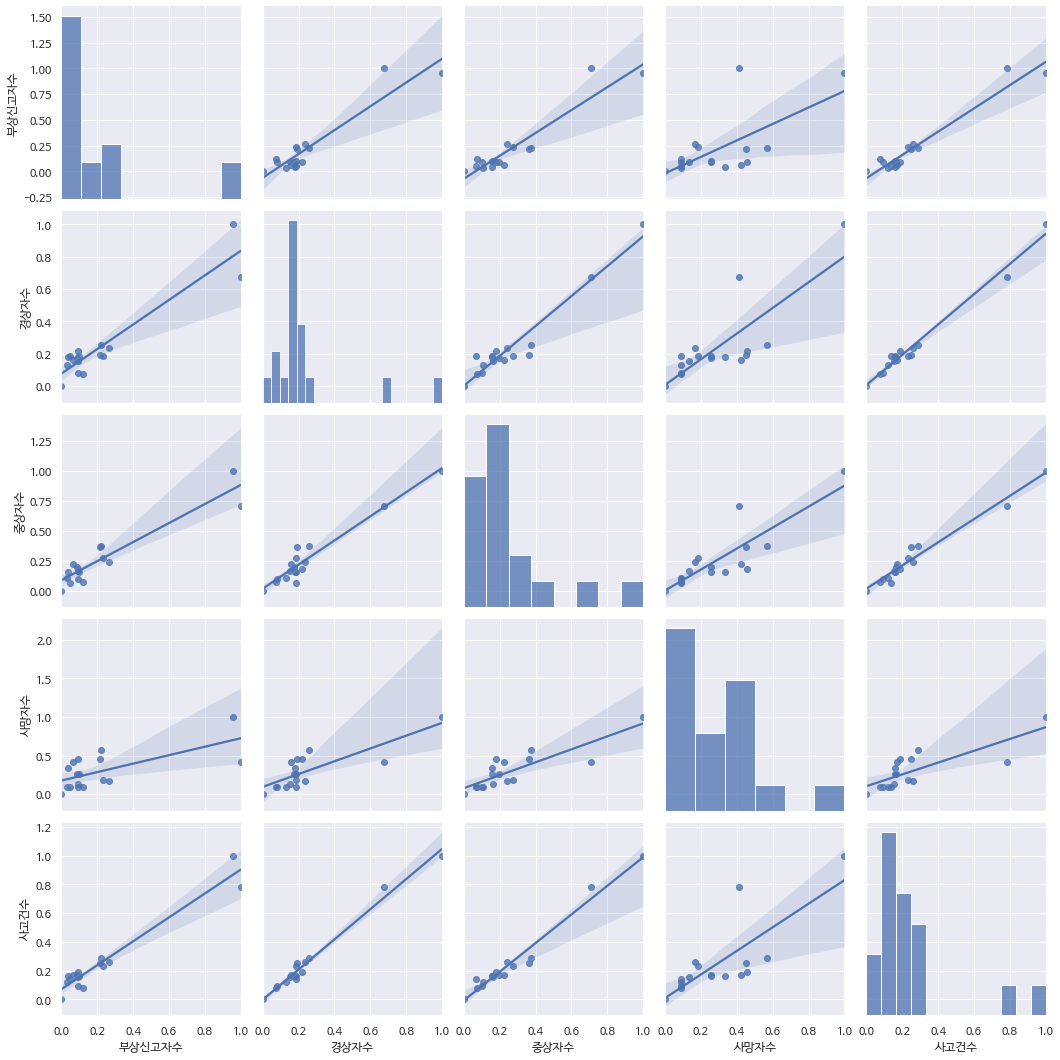

In [131]:
sns.pairplot(tf_sido_merge, vars=["부상신고자수", "경상자수", "중상자수", 
                                 "사망자수", "사고건수"], height=3, kind="reg")

Text(0.5, 1.0, '인구수와 사고건수 상관관계')

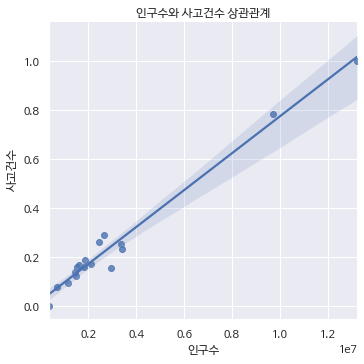

In [207]:
# 인구 와 교통사고발생건수
sns.lmplot(x="인구수", y="사고건수", height=5, data=tf_sido_merge)
plt.title("인구수와 사고건수 상관관계")

Text(0.5, 1.0, '경찰정원수와 사고건수의 상관관계')

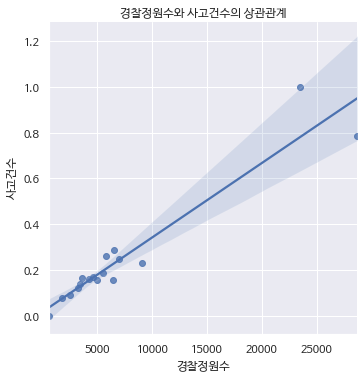

In [208]:
# 경찰정원과 교통사고발생건수
sns.lmplot(x="경찰정원수", y="사고건수", height=5, data=tf_sido_merge)
plt.title("경찰정원수와 사고건수의 상관관계")

Text(0.5, 1.0, '1인당 담당인구와 사고건수')

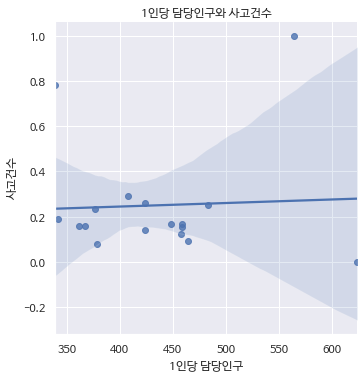

In [209]:
# 경찰 1인당 담당인구와 사고건수
sns.lmplot(x="1인당 담당인구", y="사고건수", height=5, data=tf_sido_merge)
plt.title("1인당 담당인구와 사고건수")

In [114]:
# 사고건수로 내림차순 정렬
tf_sido_merge = tf_sido_merge.sort_values(by="사고건수", ascending=False)
tf_sido_merge.head()

,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상건수,사망자비율,중상자비율,경상자비율,부상자비율,인구수,경찰정원수,1인당 담당인구,지역
시도,,,,,,,,,,,,,,
경기,1.000000,1.000000,1.000000,1.000000,0.954370,1.000000,1.661820,38.146316,100.000000,100.000000,13239666.0,23462,564.0,수도권
서울,0.784635,0.414634,0.709990,0.678170,1.000000,0.711134,0.902436,34.638186,90.498020,90.498020,9729107.0,28717,339.0,수도권
경북,0.290282,0.566783,0.375685,0.256844,0.223062,0.287275,3.218639,49.409599,92.807263,92.807263,2665836.0,6528,408.0,비수도권
대구,0.261208,0.164925,0.242295,0.237682,0.262525,0.240870,1.131572,36.055665,95.368288,95.368288,2438031.0,5752,424.0,비수도권
경남,0.250696,0.449477,0.365478,0.193062,0.216741,0.240295,2.968487,55.421511,81.333626,81.333626,3362553.0,6961,483.0,비수도권


Text(0.5, 1.0, '각 지역별 사망자수/중상자수/경상자수/부상신고자수(사고건수로 정렬)')

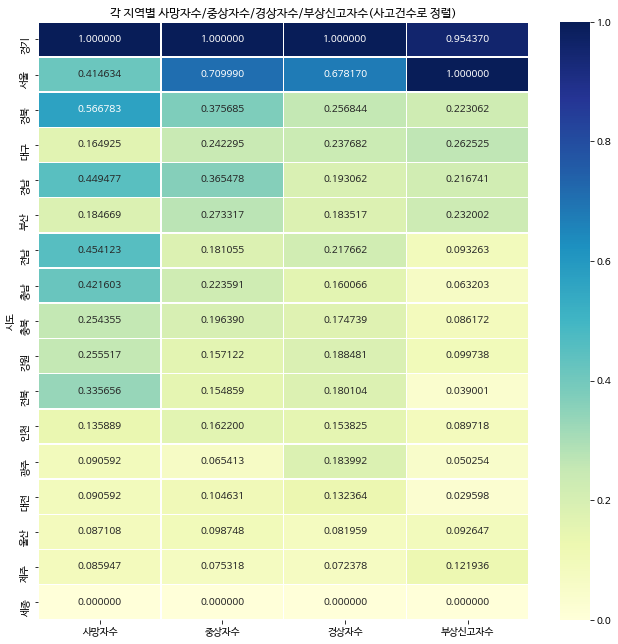

In [119]:
cols =["사망자수", "중상자수", "경상자수", "부상신고자수"]
plt.figure(figsize=(11, 11))
sns.heatmap(tf_pol_merge_sort[cols], annot=True, fmt="f", 
            linewidths=.5, cmap='YlGnBu')

plt.title("각 지역별 사망자수/중상자수/경상자수/부상신고자수(사고건수로 정렬)")